# 01. Librerías y Datos

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.api as sm

In [11]:
df= pd.read_csv('Walmart.csv')
df["Date"] = pd.to_datetime(df["Date"], format='%d-%m-%Y')
df= df.sort_values(by='Date')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1287,10,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765
5148,37,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554
2288,17,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548
4147,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324
...,...,...,...,...,...,...,...,...
3574,25,2012-10-26,688940.94,0,56.69,3.882,216.151590,7.293
714,5,2012-10-26,319550.77,0,71.70,3.506,224.037814,5.422
5719,40,2012-10-26,921264.52,0,49.65,3.917,138.728161,4.145
2573,18,2012-10-26,1127516.25,0,56.09,3.917,138.728161,8.243


# 02. Exploración de Datos

In [17]:
df["Store"].unique()

array([ 1, 10, 37, 17, 30, 25, 22, 23, 24, 19, 21, 26, 39,  8, 32, 15, 34,
       13, 38,  9,  2, 45, 20, 27, 41,  4, 31, 16, 11, 36, 42,  5, 43, 35,
       28,  6, 33, 44, 18,  3, 12, 29, 40,  7, 14], dtype=int64)

In [33]:
px.line(df, x="Date", y="Weekly_Sales", title="Weekly of all Stores", color="Store")

In [20]:
px.line(df, x="Date", y="Temperature", title="Temperature of all Stores", color="Store")

In [24]:
px.line(df, x="Date", y="Fuel_Price", title="Fuel Price of all Stores", color="Store")

In [26]:
px.line(df, x="Date", y="CPI", title="CPI of all Stores", color="Store")

In [28]:
px.line(df, x="Date", y="Unemployment", title="Unemployment of all Stores", color="Store")

In [29]:
df_ts= df[df["Store"]==1]
df_ts.set_index("Date", inplace=True)
df_ts= df_ts[["Weekly_Sales"]]
df_ts

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
...,...
2012-09-28,1437059.26
2012-10-05,1670785.97
2012-10-12,1573072.81


# 03. Feature Engineering Temporal

### 03.1 Lag Features

In [31]:
#Add lag features
for i in range(1, 13):
    df_ts[f'lag_{i}']= df_ts['Weekly_Sales'].shift(i)
df_ts

,Weekly_Sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
Date,,,,,,,,,,,,,
2010-02-05,1643690.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-12,1641957.44,1643690.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-19,1611968.17,1641957.44,1643690.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-26,1409727.59,1611968.17,1641957.44,1643690.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-05,1554806.68,1409727.59,1611968.17,1641957.44,1643690.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,1437059.26,1506126.06,1517428.87,1661767.33,1582083.40,1494122.38,1597868.05,1592409.97,1631135.79,1439123.71,1497954.76,1527014.04,1769854.16
2012-10-05,1670785.97,1437059.26,1506126.06,1517428.87,1661767.33,1582083.40,1494122.38,1597868.05,1592409.97,1631135.79,1439123.71,1497954.76,1527014.04
2012-10-12,1573072.81,1670785.97,1437059.26,1506126.06,1517428.87,1661767.33,1582083.40,1494122.38,1597868.05,1592409.97,1631135.79,1439123.71,1497954.76


In [32]:
px.line(df_ts, title="Weekly Sales of Store 1")

### 03.2 Calendar Features

In [35]:
df_ts["Week"]= df_ts.index.isocalendar().week
df_ts["Month"]= df_ts.index.month 
df_ts["Year"]= df_ts.index.year
df_ts

,Weekly_Sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,Week,Month,Year
Date,,,,,,,,,,,,,,,,
2010-02-05,1643690.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2,2010
2010-02-12,1641957.44,1643690.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2,2010
2010-02-19,1611968.17,1641957.44,1643690.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,2,2010
2010-02-26,1409727.59,1611968.17,1641957.44,1643690.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2,2010
2010-03-05,1554806.68,1409727.59,1611968.17,1641957.44,1643690.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,1437059.26,1506126.06,1517428.87,1661767.33,1582083.40,1494122.38,1597868.05,1592409.97,1631135.79,1439123.71,1497954.76,1527014.04,1769854.16,39,9,2012
2012-10-05,1670785.97,1437059.26,1506126.06,1517428.87,1661767.33,1582083.40,1494122.38,1597868.05,1592409.97,1631135.79,1439123.71,1497954.76,1527014.04,40,10,2012
2012-10-12,1573072.81,1670785.97,1437059.26,1506126.06,1517428.87,1661767.33,1582083.40,1494122.38,1597868.05,1592409.97,1631135.79,1439123.71,1497954.76,41,10,2012


### 03.3 Rolling Window

In [38]:
df_ts["rolling_mean"]= df_ts["Weekly_Sales"].rolling(window=4).mean()
df_ts["rolling_std"]= df_ts["Weekly_Sales"].rolling(window=4).std()
df_ts

,Weekly_Sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,Week,Month,Year,rolling_mean,rolling_st,rolling_std
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1643690.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2,2010,NaN,NaN,NaN
2010-02-12,1641957.44,1643690.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2,2010,NaN,NaN,NaN
2010-02-19,1611968.17,1641957.44,1643690.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,2,2010,NaN,NaN,NaN
2010-02-26,1409727.59,1611968.17,1641957.44,1643690.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2,2010,1.576836e+06,112353.415114,112353.415114
2010-03-05,1554806.68,1409727.59,1611968.17,1641957.44,1643690.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,3,2010,1.554615e+06,103135.002548,103135.002548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,1437059.26,1506126.06,1517428.87,1661767.33,1582083.40,1494122.38,1597868.05,1592409.97,1631135.79,1439123.71,1497954.76,1527014.04,1769854.16,39,9,2012,1.530595e+06,94387.836113,94387.836113
2012-10-05,1670785.97,1437059.26,1506126.06,1517428.87,1661767.33,1582083.40,1494122.38,1597868.05,1592409.97,1631135.79,1439123.71,1497954.76,1527014.04,40,10,2012,1.532850e+06,98580.217605,98580.217605
2012-10-12,1573072.81,1670785.97,1437059.26,1506126.06,1517428.87,1661767.33,1582083.40,1494122.38,1597868.05,1592409.97,1631135.79,1439123.71,1497954.76,41,10,2012,1.546761e+06,99599.489016,99599.489016


# 04. Tests

### 04.1 Test de Estacionariedad

In [39]:
#Test for stationarity
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
adf_test(df_ts["Weekly_Sales"])

Results of Dickey-Fuller Test:
Test Statistic                  -5.102186
p-value                          0.000014
#Lags Used                       4.000000
Number of Observations Used    138.000000
Critical Value (1%)             -3.478648
Critical Value (5%)             -2.882722
Critical Value (10%)            -2.578065
dtype: float64


Dado que el p-value es menor a 0.05, se rechaza la hipótesis nula y se concluye que la serie es estacionaria.

### 04.2 Test de Seasonality

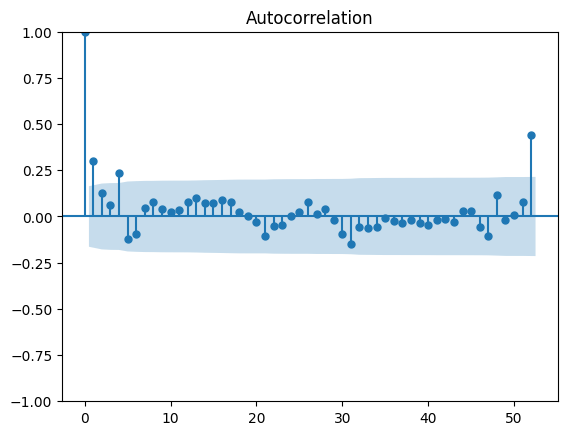

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_ts["Weekly_Sales"], lags=52);


In [51]:
from stationary_utils import check_seasonality


seasonality_res = check_seasonality(df_ts["Weekly_Sales"], max_lag=30, seasonal_period=2, confidence=0.05)
print(f"Seasonality Test for 2th lag: {seasonality_res.seasonal}")
seasonality_id_res = check_seasonality(df_ts["Weekly_Sales"], max_lag=60, confidence=0.05)
print(f"Seasonality identified for: {seasonality_res.seasonal_periods}")

Seasonality Test for 2th lag: False
Seasonality identified for: 2


### 04.4 Hetereoscedasticidad

White Test for Heteroscedasticity: False with a p-value of 0.46798326549048064


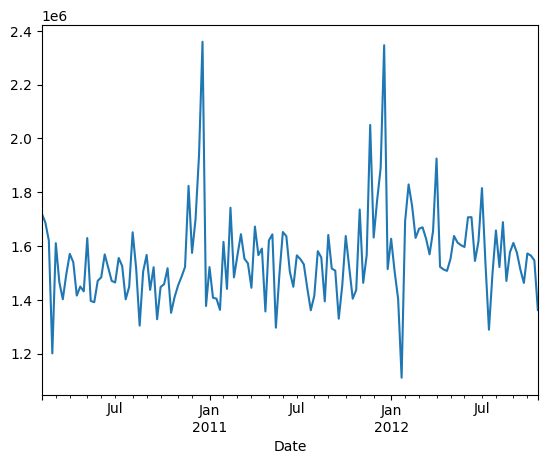

In [74]:
from target_transformations import DeseasonalizingTransformer
from stationary_utils import check_heteroscedastisticity


deseasonalizing_transformer = DeseasonalizingTransformer(seasonality_extraction="period_averages",seasonal_period=25)
y_deseasonalized = deseasonalizing_transformer.fit_transform(df_ts["Weekly_Sales"], freq="1D")
y_deseasonalized.plot()
hetero_res = check_heteroscedastisticity(y_deseasonalized, confidence=0.05)
print(f"White Test for Heteroscedasticity: {hetero_res.heteroscedastic} with a p-value of {hetero_res.lm_p_value}")

# 05. Machine Learning

In [94]:
df_ts_ml= df_ts.copy().dropna()
df_ts_ml= df_ts_ml.astype('float')
df_ts_ml.dtypes

Weekly_Sales    float64
lag_1           float64
lag_2           float64
lag_3           float64
lag_4           float64
lag_5           float64
lag_6           float64
lag_7           float64
lag_8           float64
lag_9           float64
lag_10          float64
lag_11          float64
lag_12          float64
Week            float64
Month           float64
Year            float64
rolling_mean    float64
rolling_st      float64
rolling_std     float64
dtype: object

In [98]:
X= df_ts_ml[["lag_1", "lag_2", "lag_3", "rolling_mean", "Month"]]
y= df_ts_ml["Weekly_Sales"]
X= sm.add_constant(X)

model= sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.900e+28
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:03:18   Log-Likelihood:                 2346.0
No. Observations:                 131   AIC:                            -4680.
Df Residuals:                     125   BIC:                            -4663.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.209e-09   5.61e-09     -0.572      0.568   -1.43e-08    7.89e-09
lag_1           -1.0000   3.87e-15  -2.58e+14      0.000      -1.000      -1.000
lag_2           -1.0000   3.52e-15  -2.84e+14      0.000      -1.000      -1.000
lag_3           -1.0000   3.47e-15  -2.88e+14      0.000      -1.000      -1.000
rolling_mean     4.0000   9.61e-15   4.16e+14      0.000       4.000       4.000
Month         4.184e-11    1.2e-10      0.348      0.728   -1.96e-10     2.8e-10
==============================================================================
Omnibus:                        9.022   Durbin-Watson:                   0.053
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               10.169
Skew:                          -0.465   Prob(JB):                      0.00619
Kurtosis:                       4.000   Cond. No.                     4.85e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 07. Prophet

In [61]:
from prophet import Prophet

df_prophet= df_ts.reset_index()
df_prophet= df_prophet.rename(columns={"Date": "ds", "Weekly_Sales": "y"})
df_prophet= df_prophet[["ds", "y"]]
df_prophet

,ds,y
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68
...,...,...
138,2012-09-28,1437059.26
139,2012-10-05,1670785.97
140,2012-10-12,1573072.81
141,2012-10-19,1508068.77


In [82]:
m = Prophet(seasonality_mode='additive')
m.fit(df_prophet)


18:57:19 - cmdstanpy - INFO - Chain [1] start processing
18:57:20 - cmdstanpy - INFO - Chain [1] done processing


In [83]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
503,2013-10-22
504,2013-10-23
505,2013-10-24
506,2013-10-25
507,2013-10-26


In [84]:
forecast = m.predict(future)

c:\Users\Hp\Documents\GitHub\Proyectos-de-Ingenieria-Matematica\.venv\lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\Hp\Documents\GitHub\Proyectos-de-Ingenieria-Matematica\.venv\lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



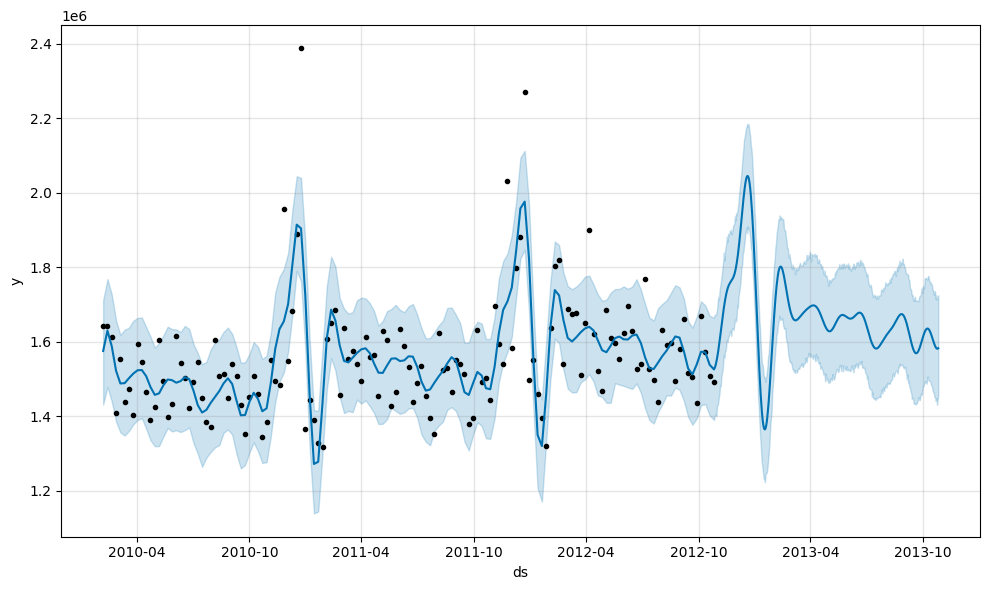

In [85]:
fig1 = m.plot(forecast)



c:\Users\Hp\Documents\GitHub\Proyectos-de-Ingenieria-Matematica\.venv\lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\Hp\Documents\GitHub\Proyectos-de-Ingenieria-Matematica\.venv\lib\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\Hp\Documents\GitHub\Proyectos-de-Ingenieria-Matematica\.venv\lib\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To 

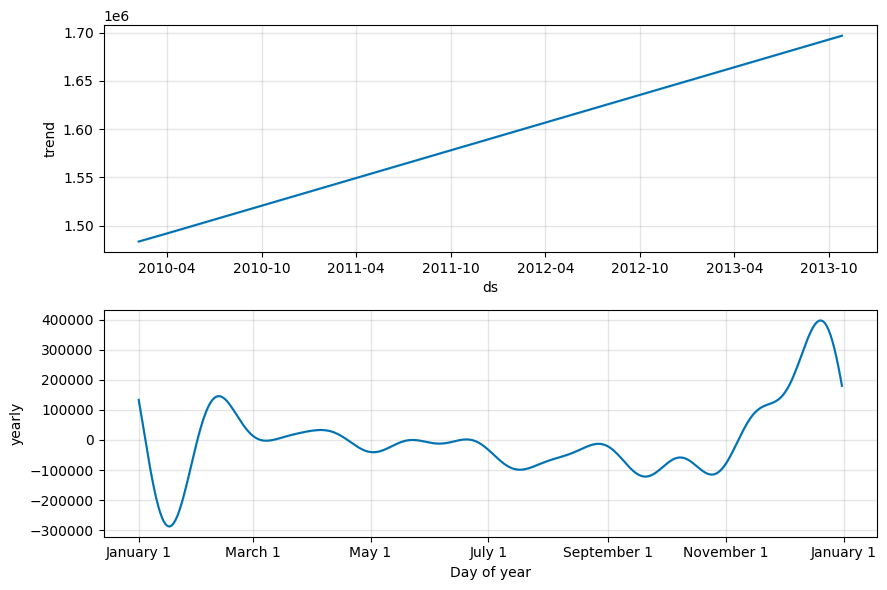

In [86]:
fig2 = m.plot_components(forecast)
